# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Question-1" data-toc-modified-id="Question-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1</a></div><div class="lev2 toc-item"><a href="#Compute-Annual-Return" data-toc-modified-id="Compute-Annual-Return-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compute Annual Return</a></div><div class="lev2 toc-item"><a href="#Compute-Annual-Volatility" data-toc-modified-id="Compute-Annual-Volatility-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Compute Annual Volatility</a></div><div class="lev2 toc-item"><a href="#Maximum-Drawdown" data-toc-modified-id="Maximum-Drawdown-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Maximum Drawdown</a></div><div class="lev3 toc-item"><a href="#Plot-Maximum-Drawdown" data-toc-modified-id="Plot-Maximum-Drawdown-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Plot Maximum Drawdown</a></div><div class="lev2 toc-item"><a href="#Sharpe-Ratio" data-toc-modified-id="Sharpe-Ratio-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Sharpe Ratio</a></div><div class="lev2 toc-item"><a href="#Sortino-Ratio" data-toc-modified-id="Sortino-Ratio-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Sortino Ratio</a></div><div class="lev2 toc-item"><a href="#VaR" data-toc-modified-id="VaR-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>VaR</a></div><div class="lev2 toc-item"><a href="#Relation-of-Portfolio-A-and-B" data-toc-modified-id="Relation-of-Portfolio-A-and-B-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Relation of Portfolio A and B</a></div><div class="lev3 toc-item"><a href="#Correlation" data-toc-modified-id="Correlation-171"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Correlation</a></div><div class="lev3 toc-item"><a href="#Scatter-Plot" data-toc-modified-id="Scatter-Plot-172"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Scatter Plot</a></div><div class="lev3 toc-item"><a href="#Two-Sample-KS-test" data-toc-modified-id="Two-Sample-KS-test-173"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Two Sample KS test</a></div><div class="lev3 toc-item"><a href="#Chi-squared-test" data-toc-modified-id="Chi-squared-test-174"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>Chi-squared test</a></div>

# Question 1

1.	Given the daily asset value of portfolio A and B (portfolio.csv), calculate the normalized annual return, annual volatility, max drawdown, sharp ratio, sortino ratio, VaR of each portfolio. Analyze the relation between two portfolios, using at least three methods.


In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
TRADING_DAY = 260
df = pd.read_csv("portfolio.csv")

In [3]:
df.describe()

,Portfolio A,Portfolio B
count,520.000000,520.000000
mean,1.392695,1.191212
std,0.203913,0.086092
min,0.909970,0.964265
25%,1.262392,1.143084
50%,1.445595,1.204797
75%,1.533111,1.246290
max,1.757672,1.398687


In [4]:
df.dtypes

Date            object
Portfolio A    float64
Portfolio B    float64
dtype: object

In [5]:
df = df.dropna(axis=0, how='all')
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df = df.set_index(['Date'])

## Compute Annual Return

In [6]:
def annual_ret(prices):
    return np.sqrt(prices[-1]/prices[0])-1

In [7]:
df.apply(annual_ret, axis=0)

Portfolio A    0.235454
Portfolio B    0.037155
dtype: float64

## Compute Annual Volatility

In [8]:
df['A_ret'], df['B_ret'] = df['Portfolio A'].pct_change(), df['Portfolio B'].pct_change()

In [9]:
def annual_vol(s, trading_days=260):
    vol = s.std(ddof=1)
    annual_vol = np.sqrt(trading_days) * vol
    return annual_vol

In [10]:
df.apply(annual_vol, axis=0)

Portfolio A    3.288006
Portfolio B    1.388184
A_ret          0.232684
B_ret          0.196596
dtype: float64

## Maximum Drawdown

In [11]:
def max_drawdown(prices):
    cummax = prices.cummax()
    drawdown = prices / cummax - 1
    mdd = min(drawdown)
    # save date for plotting
    return mdd, prices[drawdown==mdd].index

In [12]:
cols = ['Portfolio A', 'Portfolio B']
mdd_A, date_A = max_drawdown(df[cols[0]])
mdd_B, date_B = max_drawdown(df[cols[1]])
print(mdd_A)
print(mdd_B)

-0.1800048839385069
-0.27147581673350596


### Plot Maximum Drawdown

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_maxdrawdown(prices, cummax, date, thr_val):
    from matplotlib.pyplot import figure
    figure(figsize=(10, 7))

    plt.plot(prices, color='b', label='prices')
    plt.plot(cummax, color='r', label='cummax')
    plt.plot(date, thr_val ,'ro', label='through value') 

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Date")
    plt.ylabel("Unit($)")
    plt.title("Price and their cummax")

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # To load the display window
    plt.show()

In [14]:
prices_A = df[['Portfolio A']]
cummax_A = df[['Portfolio A']].cummax()
date_A, thr_val_A = date_A, prices_A.loc[date_A]

prices_B = df[['Portfolio B']]
cummax_B = df[['Portfolio B']].cummax()

date_B, thr_val_B = date_B, prices_B.loc[date_B]

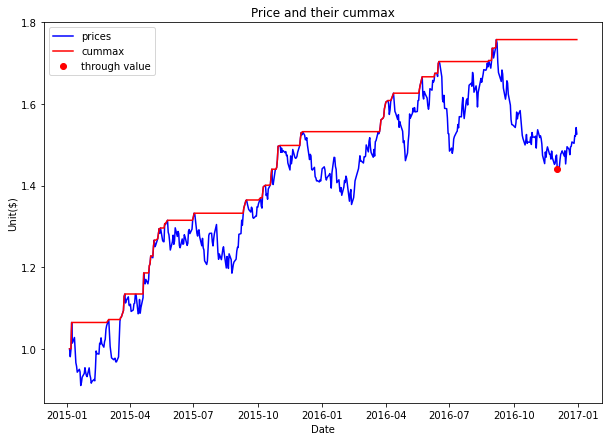

In [15]:
plot_maxdrawdown(prices_A, cummax_A, date_A, thr_val_A)

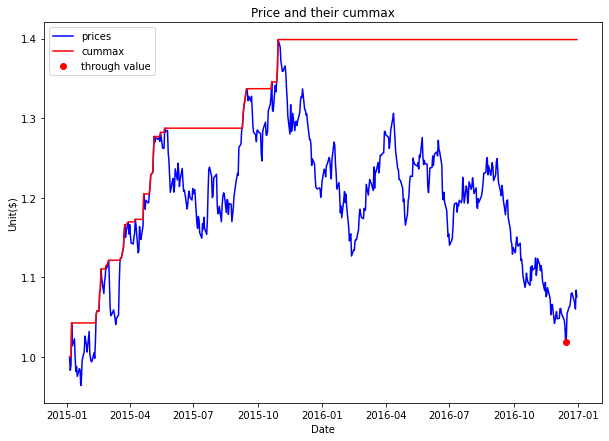

In [16]:
plot_maxdrawdown(prices_B, cummax_B, date_B, thr_val_B)

## Sharpe Ratio

In [17]:
def sharpe(x, r = 0, trading_day = TRADING_DAY):
    return (np.mean(x)*trading_day-r) / (np.std(x, ddof=1) * np.sqrt(trading_day))



In [18]:
r = 0.02
print("Portfolio A: {}={:.2f}".format('sharpe', sharpe(df['A_ret'], r)))
print("Portfolio B: {}={:.2f}".format('sharpe', sharpe(df['B_ret'], r)))

Portfolio A: sharpe=0.94
Portfolio B: sharpe=0.18


## Sortino Ratio

In [19]:
def sortino(x, r = 0, trading_day = TRADING_DAY):
    downward = np.where(x < r, 
                        x, 0)
    downward_std = np.sqrt((downward * downward).sum()/(len(downward)-1))
    return (np.mean(x) * trading_day -r) /(downward_std*np.sqrt(trading_day))

In [20]:
r = 0.02
print("Portfolio A: {}={:.2f}".format('sortino', sortino(df['A_ret'], r)))
print("Portfolio B: {}={:.2f}".format('sortino', sortino(df['B_ret'], r)))


Portfolio A: sortino=1.14
Portfolio B: sortino=0.21


## VaR

In [21]:
def take_perc(ts, q):
    temp = ts.dropna()
    temp = temp.sort_values(ascending=True).reset_index(drop=True)
    loc = len(temp) * q
    if loc < 1:
        return "Extrapolation"
    
    loc_ceil = int(math.ceil(loc))
    loc_floor = int(loc_ceil - 1)
    
    result = temp[loc_floor - 1] + (temp[loc_ceil-1] - temp[loc_floor-1])*(loc - loc_floor)
    return result
def robust_percentile(ts, q):
    if q >= 0.5:
        ts_temp = -ts.copy()
        q_temp = 1 - q
        return - take_perc(ts_temp, q_temp)
    else:
        return take_perc(ts, q)
########
def percentile(ts, q):
    '''
    Interpolated qunatile between the two adjacent points when len(ts) * q 
    not integer (nan values ingored).
    
    Parameters
    ----------
    ts: array-like time series
    q: quantile
    
    Returns: quantile of array
    
    '''
    if q > 0.5: return -percentile(-ts, 1-q)

    import math
    ts = (ts.dropna()
            .sort_values(ascending=True)
            .reset_index(drop=True))
    loc = len(ts) * q
    if loc < 1:
        raise ValueError("Length of series * quantile must be larger than 1")
    ceil = int(math.ceil(loc))
    floor = int(ceil - 1)
    result = ts[floor - 1] + (ts[ceil-1] - ts[floor-1])*(loc - floor)
    return result

In [22]:
pnl_a, pnl_b = df['Portfolio A'].diff(), df['Portfolio B'].diff()

In [23]:
q = 0.05 # quantile
print("{}% confidence that the worst daily loss of A portfolio will not exceed {}".format(1-q, robust_percentile(pnl_a, q)))
print("{}% confidence that the worst daily loss of B portfolio will not exceed {}".format(1-q, robust_percentile(pnl_b, q)))

0.95% confidence that the worst daily loss of A portfolio will not exceed -0.03282269840000007
0.95% confidence that the worst daily loss of B portfolio will not exceed -0.02258110815000002


In [24]:
print("{}% confidence that the worst daily loss of A portfolio will not exceed {}".format((1-q)*100, percentile(pnl_a, q)))
print("{}% confidence that the worst daily loss of B portfolio will not exceed {}".format((1-q)*100, percentile(pnl_b, q)))

95.0% confidence that the worst daily loss of A portfolio will not exceed -0.03282269840000007
95.0% confidence that the worst daily loss of B portfolio will not exceed -0.02258110815000002


## Relation of Portfolio A and B 

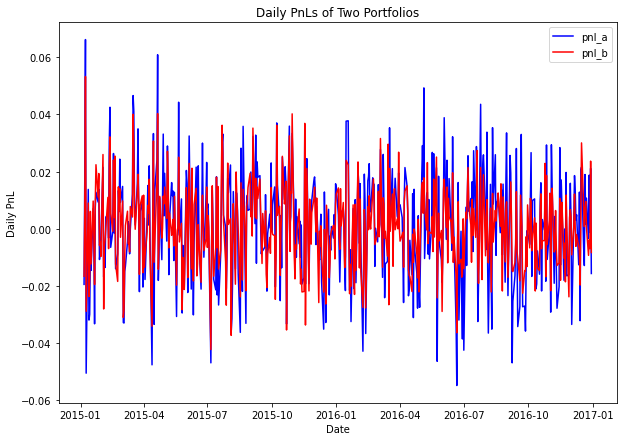

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))
plt.plot(pnl_a, color='b', label='pnl_a')
plt.plot(pnl_b, color='r', label='pnl_b')
plt.xlabel("Date")
plt.ylabel("Daily PnL")  
plt.title("Daily PnLs of Two Portfolios")
plt.legend()
plt.show()

### Correlation 

In [26]:
spearman_corr = pnl_a.corr(pnl_b, method='spearman')
pearson_corr =pnl_a.corr(pnl_b, method='pearson')
print("Spearman corr:{}".format(spearman_corr))
print("Pearson corr:{}".format(pearson_corr))


Spearman corr:0.8448411220087522
Pearson corr:0.8444412721364986


### Scatter Plot

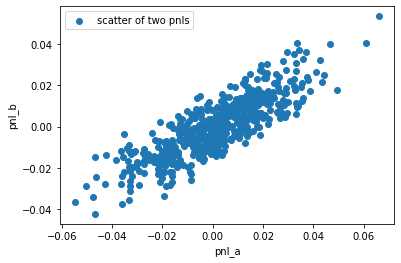

In [27]:
plt.scatter(pnl_a, pnl_b, label='scatter of two pnls')
plt.xlabel("pnl_a")
plt.ylabel("pnl_b")
plt.legend(loc='upper left')
plt.show()

### Two Sample KS test

In [28]:
from scipy import stats
# H0: from same distribution samplings

stats.ks_2samp(pnl_a, pnl_b)

Ks_2sampResult(statistic=0.11730769230769231, pvalue=0.001545819522323865)

### Chi-squared test

In [29]:
# Generate binned data from pnl_a and pnl_b
BIN_NUM = 10
min_bin = min(pnl_a.min(), pnl_b.min())
max_bin = max(pnl_a.max(), pnl_b.max())
bins = np.arange(min_bin, max_bin, step = (max_bin-min_bin) / BIN_NUM )
hist_a, _ = np.histogram(pnl_a, bins = bins)
hist_b, _ = np.histogram(pnl_b, bins = bins)

In [30]:
# H0: two independent distributions 
# H1: distributions dependent
from scipy.stats import chi2_contingency

data = [hist_a, hist_b]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 6.797256802084371e-07
Dependent (reject H0)
